In [1]:
import numpy as np
import dynfc as dyn
import scipy as sc
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat_dbg = sc.io.loadmat('../data/dbg.mat',
    squeeze_me = True)

In [3]:
signal = mat_dbg['RSsig_t'].transpose()

In [4]:
flp = 0.03
fhi = 0.07
delt = 0.392
k = 2
base = 2
nBits = 8

In [5]:
timeserie = np.zeros([signal.shape[0], signal.shape[1]])

In [6]:
signal.shape

(90, 2300)

In [7]:
for seed in range(signal.shape[0]):
            timeserie[seed, :] = dyn.butter_bandpass_filter(signal[seed, :],
                                                        flp, fhi, delt, k)

In [8]:
timeserie[0,:]

array([-0.00127779,  0.0031663 ,  0.00761458, ..., -0.0157712 ,
       -0.01335574, -0.01098003])

In [9]:
mat_dbg['timeserie'][0,:]

array([-0.03775953, -0.03266304, -0.02708857, ..., -0.01653591,
       -0.01417069, -0.01182828])

In [10]:
timeserie[0,:] - mat_dbg['timeserie'][0,:]

array([0.03648174, 0.03582933, 0.03470315, ..., 0.00076471, 0.00081495,
       0.00084825])

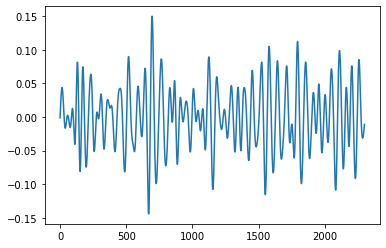

In [11]:
plt.plot(timeserie[0,:])
plt.show()

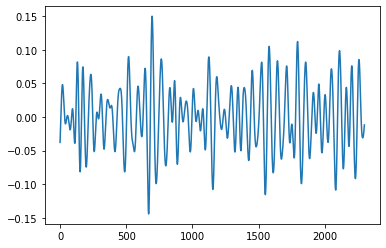

In [12]:
plt.plot(mat_dbg['timeserie'][0,:])
plt.show()

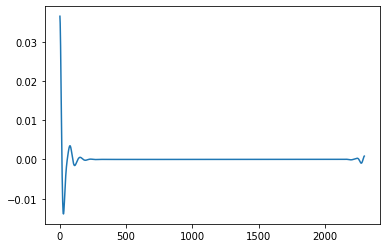

In [13]:
plt.plot(timeserie[0,:] - mat_dbg['timeserie'][0,:])
plt.show()

In [14]:
phases = dyn.doHilbert(signal.shape[0], signal.shape[1], timeserie)

In [15]:
phases[0,:]

array([-1.60846031, -1.49314558, -1.38016477, ..., -2.06646321,
       -1.97888373, -1.8606574 ])

In [16]:
mat_dbg['Phases'][0,:]

array([-2.98841348, -2.42619539, -2.28505342, ..., -2.48557112,
       -2.29766308, -3.03980753])

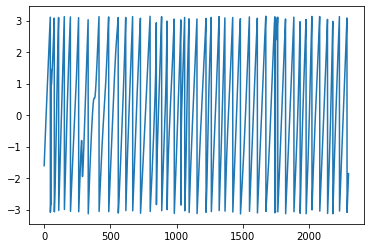

In [17]:
plt.plot(phases[0,:])
plt.show()

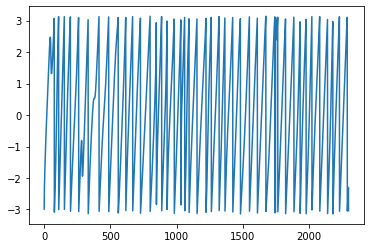

In [18]:
plt.plot(mat_dbg['Phases'][0,:])
plt.show()

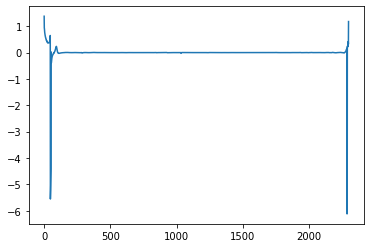

In [19]:
plt.plot(phases[0,:] - mat_dbg['Phases'][0,:])
plt.show()

In [20]:
metastabAux, syncAux, shEntropyAux = dyn.doKuramoto(
            signal.shape[0], signal.shape[1], phases, base, nBits)

In [34]:
syncAux.shape

(2280, 1)

In [33]:
metastabAux

0.14766581820326255

In [31]:
mat_dbg['syncAux'].shape

(2280,)

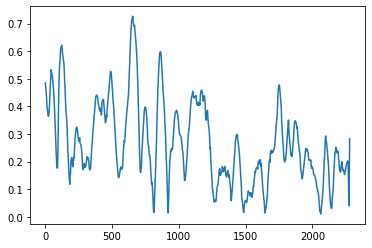

In [24]:
plt.plot(syncAux)
plt.show()

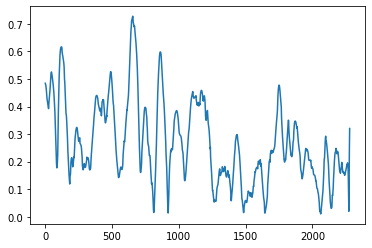

In [25]:
plt.plot(mat_dbg['syncAux'])
plt.show()

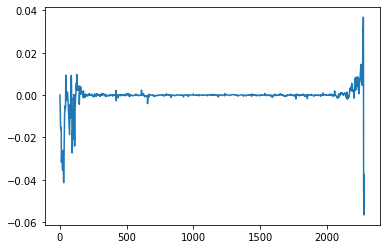

In [26]:
plt.plot(syncAux[:,0] - mat_dbg['syncAux'])
plt.show()

In [27]:
np.mean(syncAux)

0.26886038168693344

In [28]:
np.std(syncAux)

0.14766581820326255

In [29]:
np.mean(mat_dbg['syncAux'])

0.26927530157957497

In [30]:
mat_dbg['metastab']

0.1483095873658807